In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1731c2bed80325d860b9f2cb9d5922f4


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | pundri
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | freeport
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | portland
Processing Record 13 of Set 1 | xining
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | kitimat
Processing Record 18 of Set 1 | ngaoundere
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | tautira


Processing Record 35 of Set 4 | san quintin
Processing Record 36 of Set 4 | samusu
City not found. Skipping...
Processing Record 37 of Set 4 | qaanaaq
Processing Record 38 of Set 4 | ilhabela
Processing Record 39 of Set 4 | paka
Processing Record 40 of Set 4 | ginda
Processing Record 41 of Set 4 | carauari
Processing Record 42 of Set 4 | makakilo city
Processing Record 43 of Set 4 | sansai
City not found. Skipping...
Processing Record 44 of Set 4 | pokhara
Processing Record 45 of Set 4 | dhidhdhoo
Processing Record 46 of Set 4 | riyadh
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | yelkhovka
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | anori
Processing Record 2 of Set 5 | sirjan
Processing Record 3 of Set 5 | keningau
Processing Record 4 of Set 5 | natal
Processing Record 5 of Set 5 | karratha
Processing Record 6 of Set 5 | owando
Processing Record 7 of Set 5 | chagda
City not found. Skippi

Processing Record 29 of Set 8 | zarubino
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | pevek
Processing Record 33 of Set 8 | half moon bay
Processing Record 34 of Set 8 | gimli
Processing Record 35 of Set 8 | moose factory
Processing Record 36 of Set 8 | usolye
Processing Record 37 of Set 8 | comodoro rivadavia
Processing Record 38 of Set 8 | perth
Processing Record 39 of Set 8 | ternate
Processing Record 40 of Set 8 | teahupoo
Processing Record 41 of Set 8 | isla mujeres
Processing Record 42 of Set 8 | traverse city
Processing Record 43 of Set 8 | zelenoborsk
Processing Record 44 of Set 8 | strezhevoy
Processing Record 45 of Set 8 | lalin
Processing Record 46 of Set 8 | mount isa
Processing Record 47 of Set 8 | kiunga
Processing Record 48 of Set 8 | neftcala
Processing Record 49 of Set 8 | bela
Processing Record 50 of Set 8 | lahat
Processing Record 1 of Set 9 | dunedin
Processing Record 2 of Set 9 | glotovka
Processing 

Processing Record 20 of Set 12 | waipawa
Processing Record 21 of Set 12 | ahipara
Processing Record 22 of Set 12 | andrelandia
Processing Record 23 of Set 12 | artyom
Processing Record 24 of Set 12 | ibb
Processing Record 25 of Set 12 | muzhi
Processing Record 26 of Set 12 | moron
Processing Record 27 of Set 12 | parkes
Processing Record 28 of Set 12 | ranong
Processing Record 29 of Set 12 | sovkhoznyy
Processing Record 30 of Set 12 | nguruka
Processing Record 31 of Set 12 | bose
Processing Record 32 of Set 12 | mogadishu
Processing Record 33 of Set 12 | nishihara
Processing Record 34 of Set 12 | kemise
Processing Record 35 of Set 12 | malacacheta
Processing Record 36 of Set 12 | meyungs
City not found. Skipping...
Processing Record 37 of Set 12 | kigali
Processing Record 38 of Set 12 | buchanan
Processing Record 39 of Set 12 | la suiza
Processing Record 40 of Set 12 | anadyr
Processing Record 41 of Set 12 | grindavik
Processing Record 42 of Set 12 | bossembele
City not found. Skipping

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coihaique,-45.58,-72.07,51.80,50,20,5.82,CL,2020-08-31 19:41:14
1,Rikitea,-23.12,-134.97,69.31,85,100,16.15,PF,2020-08-31 19:41:15
2,Komsomolskiy,40.43,71.72,69.80,56,0,4.70,UZ,2020-08-31 19:41:15
3,Mataura,-46.19,168.86,45.00,72,67,11.01,NZ,2020-08-31 19:41:16
4,Ushuaia,-54.80,-68.30,37.40,81,40,38.03,AR,2020-08-31 19:38:32
5,Pundri,29.75,76.55,80.31,77,0,8.48,IN,2020-08-31 19:41:16
6,Faanui,-16.48,-151.75,77.32,76,0,21.27,PF,2020-08-31 19:41:16
7,Mehamn,71.04,27.85,46.40,70,79,10.29,NO,2020-08-31 19:41:16
8,Freeport,40.66,-73.58,75.20,44,1,6.93,US,2020-08-31 19:37:03
9,Coquimbo,-29.95,-71.34,57.20,67,90,8.05,CL,2020-08-31 19:37:19


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coihaique,-45.58,-72.07,51.80,50,20,5.82,CL,2020-08-31 19:41:14
1,Rikitea,-23.12,-134.97,69.31,85,100,16.15,PF,2020-08-31 19:41:15
2,Komsomolskiy,40.43,71.72,69.80,56,0,4.70,UZ,2020-08-31 19:41:15
3,Mataura,-46.19,168.86,45.00,72,67,11.01,NZ,2020-08-31 19:41:16
4,Ushuaia,-54.80,-68.30,37.40,81,40,38.03,AR,2020-08-31 19:38:32
5,Pundri,29.75,76.55,80.31,77,0,8.48,IN,2020-08-31 19:41:16
6,Faanui,-16.48,-151.75,77.32,76,0,21.27,PF,2020-08-31 19:41:16
7,Mehamn,71.04,27.85,46.40,70,79,10.29,NO,2020-08-31 19:41:16
8,Freeport,40.66,-73.58,75.20,44,1,6.93,US,2020-08-31 19:37:03
9,Coquimbo,-29.95,-71.34,57.20,67,90,8.05,CL,2020-08-31 19:37:19


In [12]:
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coihaique,CL,2020-08-31 19:41:14,-45.58,-72.07,51.80,50,20,5.82
1,Rikitea,PF,2020-08-31 19:41:15,-23.12,-134.97,69.31,85,100,16.15
2,Komsomolskiy,UZ,2020-08-31 19:41:15,40.43,71.72,69.80,56,0,4.70
3,Mataura,NZ,2020-08-31 19:41:16,-46.19,168.86,45.00,72,67,11.01
4,Ushuaia,AR,2020-08-31 19:38:32,-54.80,-68.30,37.40,81,40,38.03
5,Pundri,IN,2020-08-31 19:41:16,29.75,76.55,80.31,77,0,8.48
6,Faanui,PF,2020-08-31 19:41:16,-16.48,-151.75,77.32,76,0,21.27
7,Mehamn,NO,2020-08-31 19:41:16,71.04,27.85,46.40,70,79,10.29
8,Freeport,US,2020-08-31 19:37:03,40.66,-73.58,75.20,44,1,6.93
9,Coquimbo,CL,2020-08-31 19:37:19,-29.95,-71.34,57.20,67,90,8.05


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/31/20'

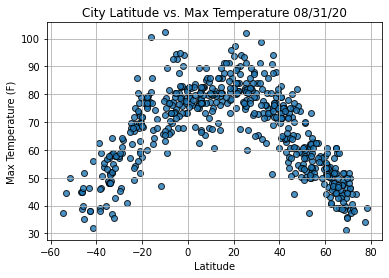

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

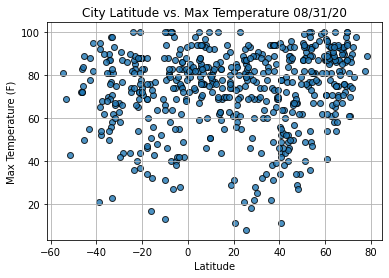

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

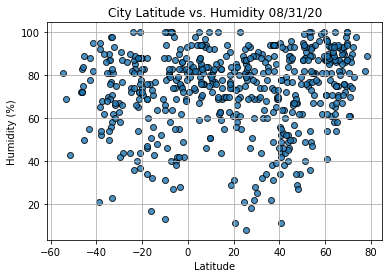

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

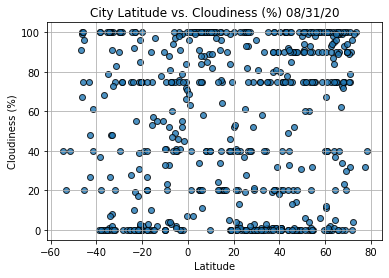

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

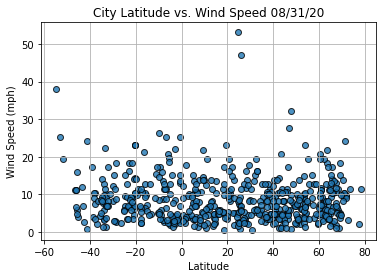

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()